# MENGENAL EXPLORATORY DATA ANALYSIS (EDA)
*Exploratory Data Analysis* atau EDA adalah langkah pertama dalam analisis data yang dikembangkan oleh John Tukey pada 1970-an. Ini adalah cara untuk menganalisis dan merangkum data, seringkali menggunakan pendekatan visual.

Analisis Data Eksplorasi mengacu pada proses penting dalam melakukan investigasi awal pada data untuk menemukan pola untuk memeriksa asumsi dengan bantuan ringkasan statistik dan representasi grafis.

EDA dapat dimanfaatkan untuk memeriksa pencilan, pola, dan tren dalam data yang diberikan.
EDA membantu menemukan pola yang berarti dalam data.
EDA memberikan wawasan mendalam tentang kumpulan data untuk memecahkan masalah bisnis kita.
EDA memberikan petunjuk untuk memperhitungkan nilai yang hilang dalam kumpulan data

## Langkah-langkahnya sebagai berikut:
1. Impor library yang dibutuhkan (pandas, numpy, seaborn, matplotlib)
2. Membaca dataset (load dataset);
3. Reduksi Data;
4. Feature Engineering (jika diperlukan);
5. Menambahkan Fitur (jika diperlukan);
6. Membersihkan Data (Data Cleaning/Wrangling);
7. Ringkasan Statistik (Statistik Deskriptif);
8. EDA Univariate Analysis
9. Data Transformation (Jika diperlukan);
10. EDA Bivariate Analysis
11. EDA Multivariate Analysis
12. Impute Missing Values

In [1]:
# Ini hanya untuk di kaggle
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


# 1. Mengimpor library yang diperkukan

In [2]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

# 2. Membaca Data (Load Data to Dataframe)

In [3]:
# membaca data
data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='unicode_escape')
pd.set_option('display.max_columns',None)

## 2.1 Menganalisis Data

In [4]:
# menampilkan 5 data pertama
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [5]:
# menampilkan 5 data terakhir
data.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5


In [6]:
# mengecek duplikasi data
data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [7]:
# menampilkan variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
# menampilkan nama kolom
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [9]:
# Memeriksa data yang kosong (missing value)
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [10]:
# menghitung presentasi data yang kosong (mising value)
(data.isnull().sum()/(len(data)))*100

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

# 3. Reduksi Data

In [11]:
# membuang kolom 'released_day'
data = data.drop(['key'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  mode                  953 non-null    ob

# 4. Menambah fitur
Misal sudah berapa lama lagu tersebut sejak dirilis hingga sekarang

In [12]:
# menambahkan kolom 'Song_Age'
from datetime import date
date.today().year
data['song_age']=date.today().year-data['released_year']
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,song_age
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,Major,80,89,83,31,0,8,4,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,Major,71,61,74,7,0,10,4,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,Major,51,32,53,17,0,31,6,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,Major,55,58,72,11,0,11,15,4
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,Minor,65,23,80,14,63,11,6,0


# 5. Membersihkan data (Data Cleaning/Wrangling)
Membersihkan data dari noise atau "inconsistent value", jika ada.

# 6. Statistik Deskriptif

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_name,953,943,Daylight,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist(s)_name,953,645,Taylor Swift,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,953.0,NaN,NaN,NaN,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,NaN,NaN,NaN,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,NaN,NaN,NaN,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,NaN,NaN,NaN,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,NaN,NaN,NaN,5200.124869,7897.60899,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,NaN,NaN,NaN,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
streams,953,949,723894473,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,953.0,NaN,NaN,NaN,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0


In [15]:
tahun_rilis = data.released_year.value_counts().reset_index()

In [16]:
tahun_rilis.sort_values

<bound method DataFrame.sort_values of     released_year  count
0            2022    402
1            2023    175
2            2021    119
3            2020     37
4            2019     36
5            2017     23
6            2016     18
7            2014     13
8            2013     13
9            2015     11
10           2018     10
11           2012     10
12           2011     10
13           2010      7
14           2002      6
15           1999      5
16           1984      4
17           2000      4
18           2004      4
19           1963      3
20           1958      3
21           1995      2
22           1970      2
23           1959      2
24           1985      2
25           1957      2
26           1986      2
27           2003      2
28           1991      2
29           2008      2
30           1975      2
31           1982      2
32           1946      1
33           2005      1
34           1942      1
35           1996      1
36           1998      1
37         

In [17]:
data['released_month']

0       7
1       3
2       6
3       8
4       5
       ..
948    11
949    10
950    11
951    10
952    11
Name: released_month, Length: 953, dtype: int64

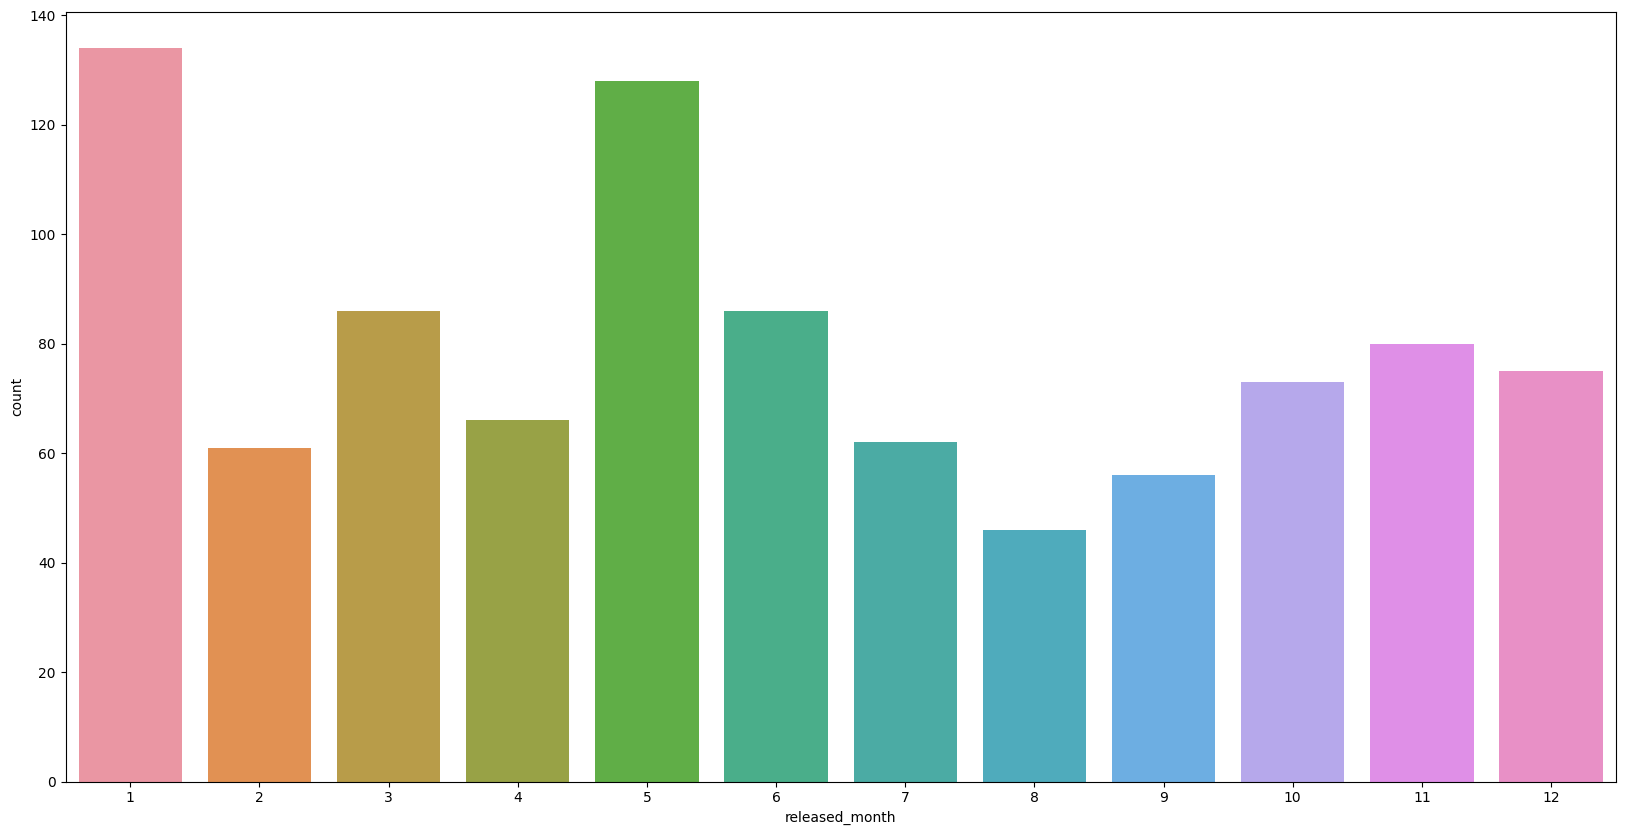

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x="released_month"),;